In [5]:
# ignore non harmful warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
# Step - 01 : Data Injection

In [4]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
# Step - 02 : Perform basic data quality checks

In [8]:
df.shape

(50, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
# Check missing values - Blank Values

In [13]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [14]:
# Check duplicate values

In [16]:
df.duplicated().sum()

np.int64(0)

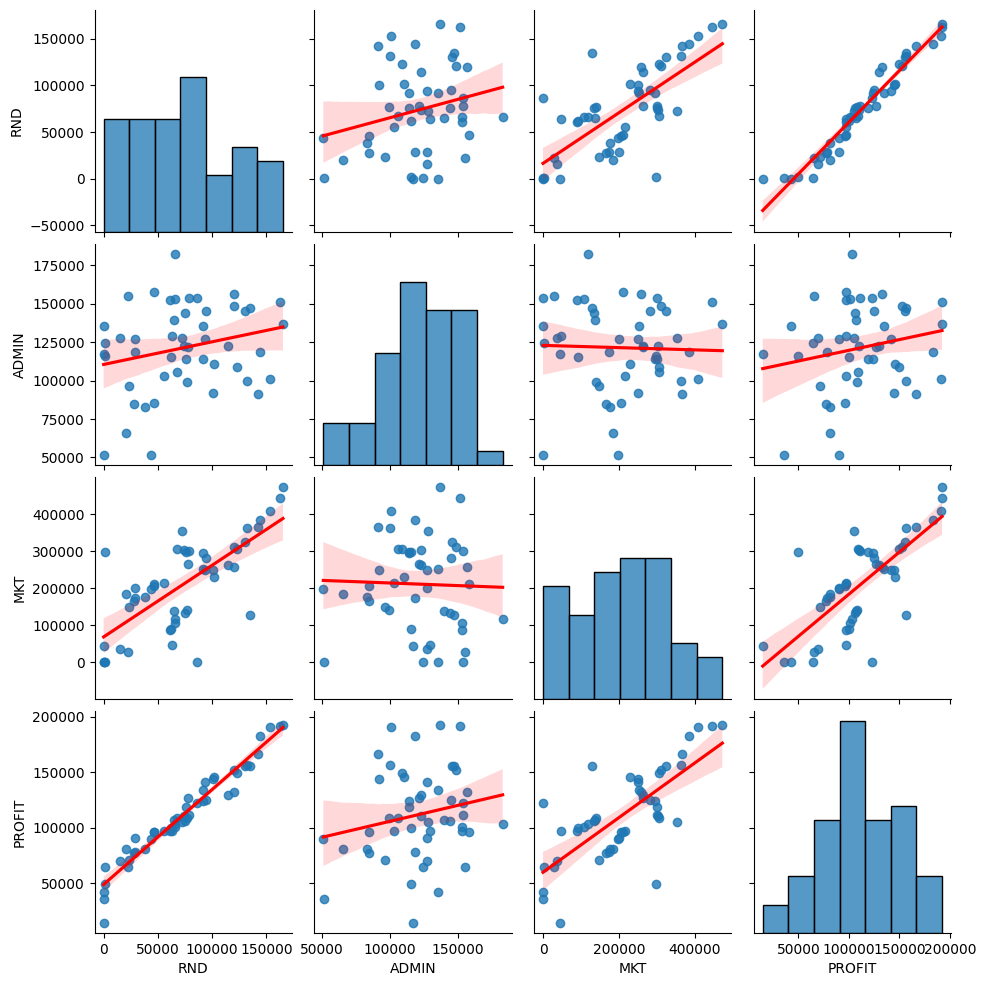

In [32]:
# Visualize Data - Optional

import seaborn as sns
sns.pairplot(df , kind='reg' , plot_kws={"line_kws": {"color": "red"}})

In [21]:
corr = df.corr(numeric_only=True)
corr

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


<Axes: >

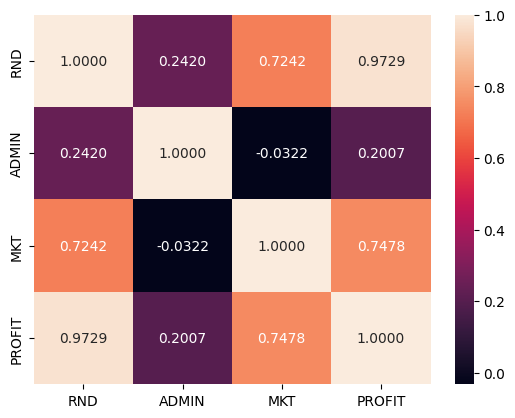

In [33]:
sns.heatmap(corr, annot=True, fmt=".4f")

In [ ]:
# Step - 03 : Seperate X and Y (PROFIT)

In [22]:
X = df[['RND']]
Y = df[['PROFIT']]

In [23]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [28]:
# Step - 04 : Model Training Phase -> Fit the straight line

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
model.intercept_

array([49032.89914125])

In [31]:
model.coef_

array([[0.85429137]])

In [34]:
# Profit_pred = 0.8543 x RND + 49032.9